In [1]:
%matplotlib inline
import os
import copy
from tomato.audio.audioanalyzer import AudioAnalyzer
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 8)


In [2]:
# instantiate
audio_filename = os.path.join('ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede',
                              'f970f1e0-0be9-4914-8302-709a0eac088e',
                              'f970f1e0-0be9-4914-8302-709a0eac088e.mp3')

audioAnalyzer = AudioAnalyzer(verbose=True)

You can use the single line call "analyze," which does all the available analysis simultaneously

- Getting relevant metadata of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 1.50 seconds to execute.
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 37.90 seconds to execute.
- Filtering predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 4.92 seconds to execute.
- Computing pitch distribution of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.03 seconds to execute.
- Computing pitch class distribution of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Computing pitch dis

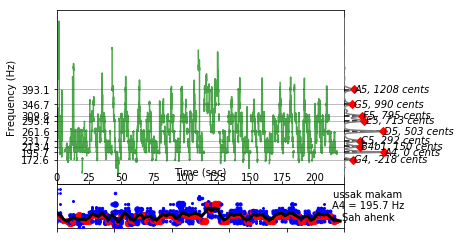

In [3]:
# NOTE: This will take several minutes depending on the performance of your machine
audio_features = audioAnalyzer.analyze(audio_filename)

# plot the features
audioAnalyzer.plot(audio_features)
matplotlib.pyplot.show()


... or call all the methods individually

In [4]:
# audio metadata extraction
metadata = audioAnalyzer.crawl_musicbrainz_metadata(audio_filename)

# predominant melody extraction
pitch = audioAnalyzer.extract_pitch(audio_filename)

# pitch post filtering
pitch_filtered = audioAnalyzer.filter_pitch(pitch)

# histogram computation
pitch_distribution = audioAnalyzer.compute_pitch_distribution(pitch_filtered)
pitch_class_distribution = copy.deepcopy(pitch_distribution)
pitch_class_distribution.to_pcd()

# tonic identification
tonic = audioAnalyzer.identify_tonic(pitch_filtered)

# get the makam from metadata if possible else apply makam recognition
makams = audioAnalyzer.get_makams(metadata, pitch_filtered, tonic)
makam = list(makams)[0]  # for now get the first makam

# transposition (ahenk) identification
transposition = audioAnalyzer.identify_transposition(tonic, makam)

# stable note extraction (tuning analysis)
note_models = audioAnalyzer.compute_note_models(pitch_distribution, tonic, makam)

# get the melodic progression model
melodic_progression = audioAnalyzer.compute_melodic_progression(pitch_filtered)


- Getting relevant metadata of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 1.48 seconds to execute.
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 39.73 seconds to execute.
- Filtering predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 4.98 seconds to execute.
- Computing pitch distribution of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.03 seconds to execute.
- Identifying tonic from the predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call